In [1]:
import pandas as pd 

In [2]:
rename_dict = {
    "일시": "날짜",
    "평균기온(°C)": "평균 기온",
    "최고기온(°C)": "최고 기온",
    "평균상대습도(%)": "습도"
}

In [3]:
df = pd.read_csv("./weather_csv/weather_data.csv", encoding="cp949").rename(columns=rename_dict)

In [4]:
df.columns

Index(['지점', '지점명', '날짜', '평균 기온', '최고 기온', '습도'], dtype='object')

In [5]:
for col in ["평균 기온", "최고 기온","습도"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [6]:
df.head()

,지점,지점명,날짜,평균 기온,최고 기온,습도
0,90,속초,2020-06,22.2,33.2,74.0
1,90,속초,2020-07,21.6,33.3,85.0
2,90,속초,2020-08,25.7,35.1,82.0
3,90,속초,2020-09,20.1,28.7,75.0
4,90,속초,2020-10,14.3,23.7,60.0


In [7]:
region_map = {
    # 강원도
    "강릉": "강원도", "대관령": "강원도", "동해": "강원도", "북강릉": "강원도",
    "북춘천": "강원도", "삼척": "강원도", "속초": "강원도", "영월": "강원도",
    "원주": "강원도", "인제": "강원도", "정선군": "강원도", "철원": "강원도",
    "춘천": "강원도", "태백": "강원도", "홍천": "강원도",

    # 경기
    "동두천": "경기", "수원": "경기", "양평": "경기", "이천": "경기", "파주": "경기",

    # 경남
    "거제": "경남", "거창": "경남", "김해시": "경남", "남해": "경남", "밀양": "경남",
    "북창원": "경남", "산청": "경남", "양산시": "경남", "의령군": "경남", "진주": "경남",
    "창원": "경남", "통영": "경남", "함양군": "경남", "합천": "경남",

    # 경북
    "경주시": "경북", "구미": "경북", "문경": "경북", "봉화": "경북", "상주": "경북",
    "안동": "경북", "영덕": "경북", "영주": "경북", "영천": "경북", "울릉도": "경북",
    "울진": "경북", "의성": "경북", "청송군": "경북", "포항": "경북",

    # 광역시 및 특별시
    "광주": "광주", "대구": "대구", "대전": "대전",
    "부산": "부산", "북부산": "부산", "서울": "서울",
    "세종": "세종", "울산": "울산", "강화": "인천", "백령도": "인천", "인천": "인천",

    # 전남
    "강진군": "전남", "고흥": "전남", "광양시": "전남", "목포": "전남", "무안": "전남",
    "보성군": "전남", "순천": "전남", "여수": "전남", "영광군": "전남", "완도": "전남",
    "장흥": "전남", "주암": "전남", "진도군": "전남", "해남": "전남", "흑산도": "전남",

    # 전북
    "고창": "전북", "고창군": "전북", "군산": "전북", "남원": "전북", "부안": "전북",
    "순창군": "전북", "임실": "전북", "장수": "전북", "전주": "전북", "정읍": "전북",

    # 제주
    "고산": "제주도", "서귀포": "제주도", "성산": "제주도", "제주": "제주도",

    # 충남
    "금산": "충남", "보령": "충남", "부여": "충남", "서산": "충남", "천안": "충남", "홍성": "충남",

    # 충북
    "보은": "충북", "서청주": "충북", "제천": "충북", "청주": "충북", "추풍령": "충북", "충주": "충북"
}


In [8]:
df["지역"] = df["지점명"].map(region_map)
# 지점, 지점명 제거 및 지역 맨앞으로
df = df.drop(columns=['지점', '지점명'])
cols = ['지역'] + [col for col in df.columns if col != '지역']
df = df[cols]

In [9]:
# 날짜에서 연도와 월 분리
df['연도'] = df['날짜'].str[:4].astype(int)
df['월'] = df['날짜'].str[5:7].astype(int)

df.drop(columns=['날짜'], inplace=True)

# 결과 확인
df.head()


,지역,평균 기온,최고 기온,습도,연도,월
0,강원도,22.2,33.2,74.0,2020,6
1,강원도,21.6,33.3,85.0,2020,7
2,강원도,25.7,35.1,82.0,2020,8
3,강원도,20.1,28.7,75.0,2020,9
4,강원도,14.3,23.7,60.0,2020,10


In [10]:
# 6, 7, 8월만 남기기
df = df[df['월'].isin([6, 7, 8])].reset_index(drop=True)

df.head()

,지역,평균 기온,최고 기온,습도,연도,월
0,강원도,22.2,33.2,74.0,2020,6
1,강원도,21.6,33.3,85.0,2020,7
2,강원도,25.7,35.1,82.0,2020,8
3,강원도,20.3,30.0,81.0,2021,6
4,강원도,25.5,33.2,85.0,2021,7


In [11]:
df.tail()

,지역,평균 기온,최고 기온,습도,연도,월
1432,부산,26.1,34.9,86.0,2023,7
1433,부산,27.9,35.7,77.0,2023,8
1434,부산,23.2,33.6,74.0,2024,6
1435,부산,27.1,37.0,87.0,2024,7
1436,부산,29.3,36.8,80.0,2024,8


In [12]:
df2 = pd.read_csv('./power/주택용_전력데이터.csv')

In [13]:
# 시도 코드와 시도명 매핑 딕셔너리
sido_mapping = {
    11: '서울',
    26: '부산',
    27: '대구',
    28: '인천',
    29: '광주',
    30: '대전',
    31: '울산',
    36: '세종',
    41: '경기',
    43: '충북',
    44: '충남',
    46: '전남',
    47: '경북',
    48: '경남',
    50: '제주',
    51: '강원도',
    52: '전북'
}

In [14]:
# 시도명을 새 컬럼으로 추가
df2['지역'] = df2['시도'].map(sido_mapping)

In [15]:
df2.drop(columns=['시도'], inplace=True)

In [16]:
df2.head()

,연도,월,사용량(kWh),전기요금(원),평균단가(원/kWh),지역
0,2020,6,1135016306,124221044153,109.4,서울
1,2020,7,1217456430,130444022697,107.1,서울
2,2020,8,1411611643,155152238181,109.9,서울
3,2021,6,1127819486,118440986106,105.0,서울
4,2021,7,1391209916,161420259249,116.0,서울


In [17]:
merged_df = pd.merge(df2, df, on=['연도', '월', '지역'], how='inner')

merged_df.head()

,연도,월,사용량(kWh),전기요금(원),평균단가(원/kWh),지역,평균 기온,최고 기온,습도
0,2020,6,1135016306,124221044153,109.4,서울,23.9,35.4,68.0
1,2020,7,1217456430,130444022697,107.1,서울,24.1,32.9,77.0
2,2020,8,1411611643,155152238181,109.9,서울,26.5,34.5,85.0
3,2021,6,1127819486,118440986106,105.0,서울,22.8,31.6,73.0
4,2021,7,1391209916,161420259249,116.0,서울,28.1,36.5,71.0


In [ ]:
merged_df

,연도,월,사용량(kWh),전기요금(원),평균단가(원/kWh),지역,평균 기온,최고 기온,습도
0,2020,6,1135016306,124221044153,109.4,서울,23.9,35.4,68.0
1,2020,7,1217456430,130444022697,107.1,서울,24.1,32.9,77.0
2,2020,8,1411611643,155152238181,109.9,서울,26.5,34.5,85.0
3,2021,6,1127819486,118440986106,105.0,서울,22.8,31.6,73.0
4,2021,7,1391209916,161420259249,116.0,서울,28.1,36.5,71.0
...,...,...,...,...,...,...,...,...,...
1372,2024,8,324683275,52599373330,162.0,전북,28.8,36.7,78.0
1373,2024,8,324683275,52599373330,162.0,전북,28.2,36.3,78.0
1374,2024,8,324683275,52599373330,162.0,전북,25.8,33.8,84.0
1375,2024,8,324683275,52599373330,162.0,전북,28.2,35.5,79.0


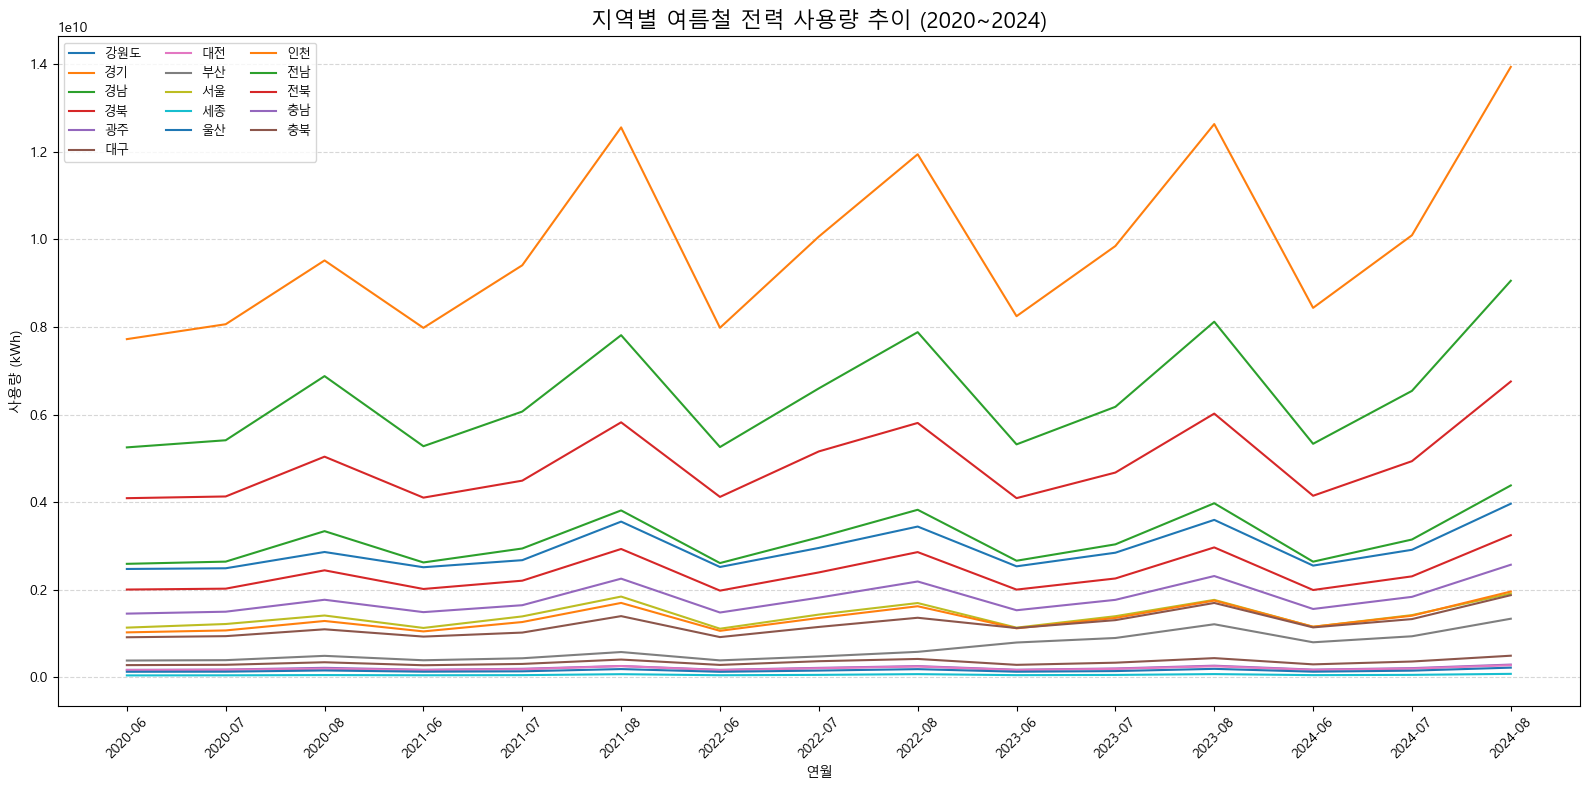

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'    # macOS
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # 리눅스나 colab 등

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지


# '연-월' 문자열 생성
merged_df['연월'] = merged_df['연도'].astype(str) + '-' + merged_df['월'].astype(str).str.zfill(2)

# 지역별로 그룹핑하여 사용량 합산
region_data = merged_df.groupby(['지역', '연월'])['사용량(kWh)'].sum().reset_index()

# x축 순서를 명시적으로 지정 (카테고리형)
sorting = sorted(region_data['연월'].unique())
region_data['연월'] = pd.Categorical(region_data['연월'], categories=sorting, ordered=True)

# 📈 시각화 시작
plt.figure(figsize=(16, 8))

for region in region_data['지역'].unique():
    region_df = region_data[region_data['지역'] == region]
    plt.plot(region_df['연월'], region_df['사용량(kWh)'], label=region)

plt.title("지역별 여름철 전력 사용량 추이 (2020~2024)", fontsize=16)
plt.xlabel("연월")
plt.ylabel("사용량 (kWh)")
plt.xticks(rotation=45)
plt.legend(ncol=3, fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [50]:
merged_df.isnull().sum()

연도             0
월              0
사용량(kWh)       0
전기요금(원)        0
평균단가(원/kWh)    0
지역             0
평균 기온          0
최고 기온          0
습도             0
지역코드           0
날짜             0
연월             0
dtype: int64

In [66]:
merged_df

,연도,월,사용량(kWh),전기요금(원),평균단가(원/kWh),지역,평균 기온,최고 기온,습도,log_사용량
0,2020,6,1135016306,124221044153,109.4,서울,23.9,35.4,68.0,20.849913
1,2020,7,1217456430,130444022697,107.1,서울,24.1,32.9,77.0,20.920030
2,2020,8,1411611643,155152238181,109.9,서울,26.5,34.5,85.0,21.067998
3,2021,6,1127819486,118440986106,105.0,서울,22.8,31.6,73.0,20.843552
4,2021,7,1391209916,161420259249,116.0,서울,28.1,36.5,71.0,21.053440
...,...,...,...,...,...,...,...,...,...,...
1372,2024,8,324683275,52599373330,162.0,전북,28.8,36.7,78.0,19.598361
1373,2024,8,324683275,52599373330,162.0,전북,28.2,36.3,78.0,19.598361
1374,2024,8,324683275,52599373330,162.0,전북,25.8,33.8,84.0,19.598361
1375,2024,8,324683275,52599373330,162.0,전북,28.2,35.5,79.0,19.598361


                            MAE          RMSE        R2
Linear Regression  2.001161e+08  3.718493e+08 -0.011490
Random Forest      2.390083e+08  4.274007e+08 -0.336282
XGBoost            2.548086e+08  4.634841e+08 -0.571439


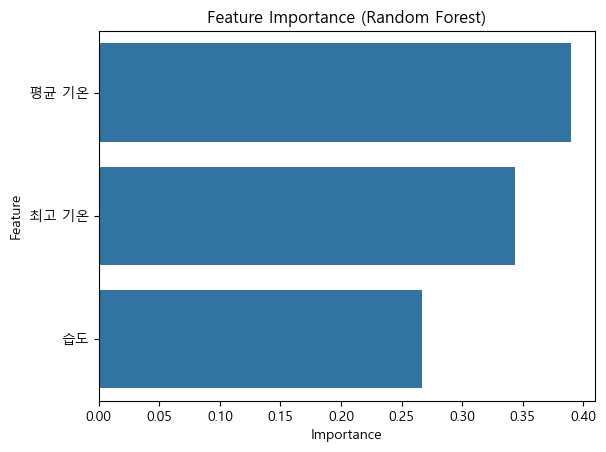

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 사용할 변수 선택
features = ['평균 기온', '최고 기온', '습도']
target = '사용량(kWh)'

# 결측치 처리
for col in features:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

X = merged_df[features]
y = merged_df[target]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 리스트 정의
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = {}

# 각 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

# 결과 출력
results_df = pd.DataFrame(results).T
print(results_df)

# 변수 중요도 시각화 (Random Forest 기준)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_

sns.barplot(x=importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


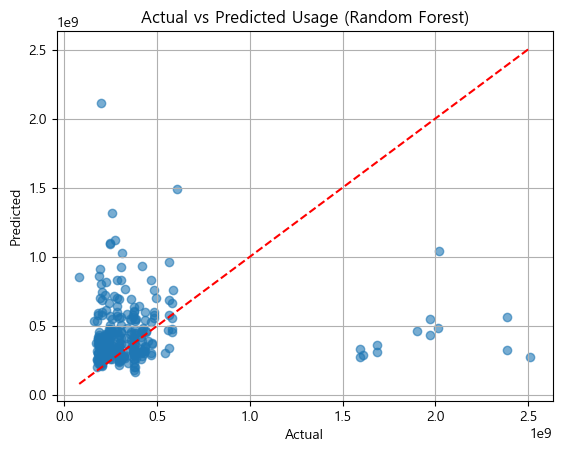

In [48]:
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Usage (Random Forest)")
plt.grid(True)
plt.show()

In [ ]:
# 데이터 스케일링
# 사용할 변수 선택
features = ['평균 기온', '최고 기온', '습도']
target = '사용량(kWh)'

# 결측치 처리
for col in features:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

X = merged_df[features]
y = merged_df[target]

# IQR(사분위 범위) 기반 이상치 탐지 (타겟 변수 '사용량(kWh)'에 대해)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_iqr_upper = Q3 + 1.5 * IQR # 상위 이상치 경계
outlier_threshold_iqr_lower = Q1 - 1.5 * IQR # 하위 이상치 경계

outliers_iqr_upper_indices = y[y > outlier_threshold_iqr_upper].index
outliers_iqr_lower_indices = y[y < outlier_threshold_iqr_lower].index

print(f"\nIQR로 탐지된 상위 이상치 인덱스 (타겟 변수):\n{outliers_iqr_upper_indices}")
print(f"IQR로 탐지된 상위 이상치 값 (타겟 변수):\n{y[outliers_iqr_upper_indices]}")
print(f"IQR로 탐지된 하위 이상치 인덱스 (타겟 변수):\n{outliers_iqr_lower_indices}")
print(f"IQR로 탐지된 하위 이상치 값 (타겟 변수):\n{y[outliers_iqr_lower_indices]}")

# 이상치 처리: 데이터셋에서 이상치 제거
initial_shape = merged_df.shape
df_no_outliers = merged_df[
    (merged_df[target] <= outlier_threshold_iqr_upper) &
    (merged_df[target] >= outlier_threshold_iqr_lower)
].copy() # .copy()를 사용하여 SettingWithCopyWarning 방지

print(f"\n원래 데이터프레임 형태: {initial_shape}")
print(f"이상치 제거 후 데이터프레임 형태: {df_no_outliers.shape}")
print(f"제거된 행의 수: {initial_shape[0] - df_no_outliers.shape[0]}")

# X와 y를 정제된(cleaned) 데이터로 다시 할당
X_cleaned = df_no_outliers[features]
y_cleaned = df_no_outliers[target]



IQR로 탐지된 상위 이상치 인덱스 (타겟 변수):
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  34,  35, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230],
      dtype='int64')
IQR로 탐지된 상위 이상치 값 (타겟 변수):
0      1135016306
1      1217456430
2      1411611643
3      1127819486
4      1391209916
          ...    
226    2787906934
227    2787906934
228    2787906934
229    2787906934
230    2787906934
Name: 사용량(kWh), Length: 92, dtype: int64
IQR로 탐지된 하위 이상치 인덱스 (타겟 변수):
Index([], dtype='int64')
IQR로 탐지된 하위 이상치 값 (타겟 변수):
Series([], Name: 사용량(kWh), dtype: int64)

원래 데이터프레임 형태: (1377, 10)
이상치 제거 후 데이터프레임 형태: (1285


--- 정제되고 스케일링된 데이터로 모델 성능 평가 ---
                            MAE          RMSE        R2
Linear Regression  8.119515e+07  9.974439e+07  0.149313
Random Forest      8.320449e+07  1.046873e+08  0.062911
XGBoost            9.217372e+07  1.174477e+08 -0.179457


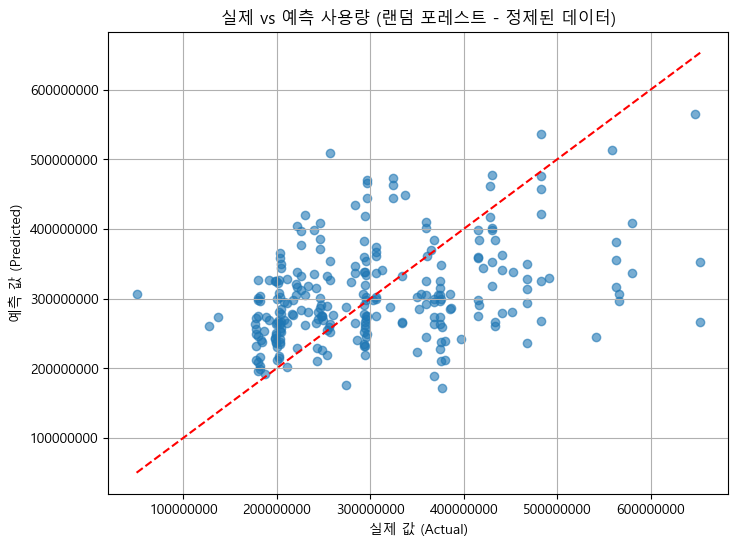

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler를 사용하여 특성 데이터 표준화
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X_cleaned)
X_cleaned_scaled_df = pd.DataFrame(X_scaled_standard, columns=features, index=X_cleaned.index)

# 학습/테스트 데이터 분할 (정제된 데이터 사용)
# 스케일링된 특성 데이터를 X_train_cleaned, X_test_cleaned에 사용합니다.
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned_scaled_df, y_cleaned, test_size=0.2, random_state=42
)

# 모델 리스트 정의 (이전과 동일)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results_cleaned = {}

# 각 모델 학습 및 평가
print("\n--- 정제되고 스케일링된 데이터로 모델 성능 평가 ---")
for name, model in models.items():
    model.fit(X_train_cleaned, y_train_cleaned)
    y_pred_cleaned = model.predict(X_test_cleaned)

    mae = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
    rmse = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))
    r2 = r2_score(y_test_cleaned, y_pred_cleaned)

    results_cleaned[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

# 결과 출력
results_df_cleaned = pd.DataFrame(results_cleaned).T
print(results_df_cleaned)

# --- Random Forest에 대한 실제 vs 예측 시각화 (데이터 정제 후) ---
# 이제 그래프의 점들이 빨간 선에 더 가까이 모여야 합니다.
rf_model_cleaned = models['Random Forest']
y_pred_rf_cleaned = rf_model_cleaned.predict(X_test_cleaned)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_pred_rf_cleaned, alpha=0.6)
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], 'r--')
plt.xlabel('실제 값 (Actual)')
plt.ylabel('예측 값 (Predicted)')
plt.title('실제 vs 예측 사용량 (랜덤 포레스트 - 정제된 데이터)')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='both') # 지수 표기법 대신 일반 숫자 표기
plt.show()

                                R2
Linear Regression (Final)  0.97057


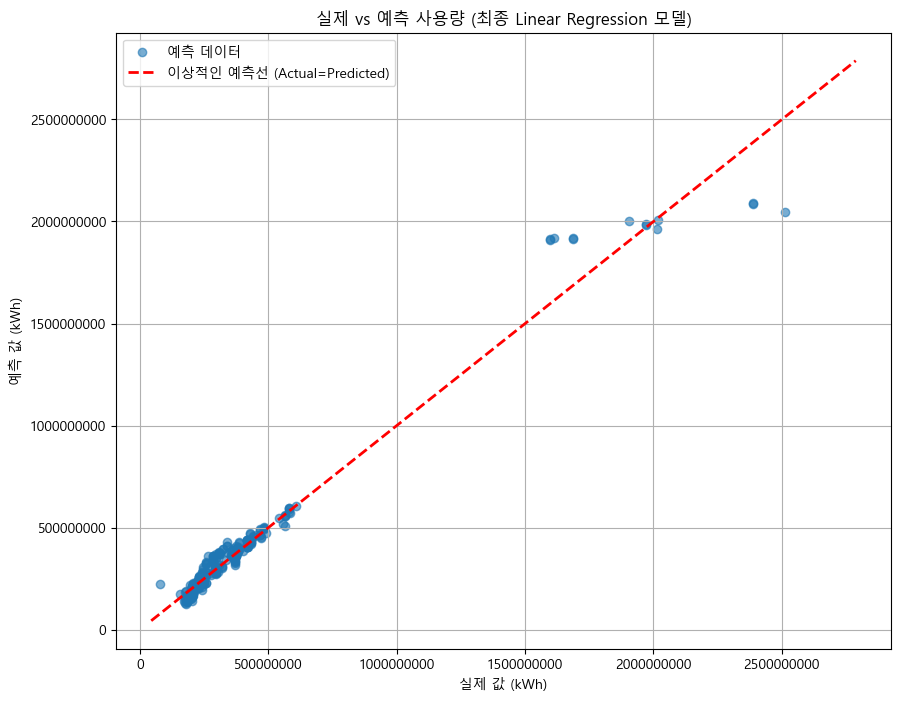

In [71]:
from sklearn.preprocessing import PolynomialFeatures

# 새로운 특성 추가 및 PolynomialFeatures 결합
# 사용할 특성 확장
features_expanded = ['평균 기온', '최고 기온', '습도', '월', '연도']
target = '사용량(kWh)'

# 범주형 변수(지역)를 One-Hot Encoding
X_combined = pd.get_dummies(merged_df, columns=['지역'], dtype=int)
# 특성 목록 정리
numerical_features = ['평균 기온', '최고 기온', '습도', '월', '연도']
categorical_features_onehot = [col for col in X_combined.columns if '지역_' in col]
final_features = numerical_features + categorical_features_onehot

X_combined = X_combined[final_features]
y = merged_df[target]

# 수치형 특성만 PolynomialFeatures 적용
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_numerical = poly.fit_transform(X_combined[numerical_features])
X_poly_numerical_df = pd.DataFrame(X_poly_numerical, 
                                   columns=poly.get_feature_names_out(numerical_features),
                                   index=X_combined.index)

# 다항 특성과 One-Hot Encoding된 특성을 다시 결합
X_final = pd.concat([X_poly_numerical_df, X_combined[categorical_features_onehot]], axis=1)

# 학습/테스트 데이터 분할
X_train_final, X_test_final, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# 최종 모델 학습 및 평가
models = {'Linear Regression (Final)': LinearRegression()} # Linear Regression에 가장 효과적
results_final = {}
for name, model in models.items():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_final)
    X_test_scaled = scaler.transform(X_test_final)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    results_final[name] = {'R2': r2}

results_df_final = pd.DataFrame(results_final).T
print(results_df_final)

# --- 결과(실제 vs 예측 값) 시각화 ---
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, label='예측 데이터')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='이상적인 예측선 (Actual=Predicted)')
plt.xlabel('실제 값 (kWh)')
plt.ylabel('예측 값 (kWh)')
plt.title('실제 vs 예측 사용량 (최종 Linear Regression 모델)')
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain', axis='both')
plt.show()